# Imports

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [201]:
import kagglehub

path = kagglehub.dataset_download("jeanmidev/smart-meters-in-london")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/smart-meters-in-london


# Dataset (Block 10)

In [202]:
path = '/kaggle/input/smart-meters-in-london/hhblock_dataset/hhblock_dataset/block_10.csv'

In [203]:
df = pd.read_csv(path)

In [204]:
df.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000322,2012-03-07,0.125,0.104,0.133,0.145,0.109,0.298,0.149,0.119,...,0.087,0.092,0.187,0.130,0.096,0.096,0.137,0.101,0.137,0.485
1,MAC000322,2012-03-08,0.279,0.247,0.253,0.275,0.114,0.105,0.117,0.141,...,0.105,0.132,0.252,0.105,0.096,0.129,0.120,0.070,0.039,0.074
2,MAC000322,2012-03-09,0.036,0.130,0.364,0.120,0.100,0.118,0.146,0.105,...,0.028,0.030,0.072,0.038,0.029,0.046,0.069,0.029,0.050,0.520
3,MAC000322,2012-03-10,0.435,0.093,0.105,0.138,0.099,0.096,0.133,0.129,...,0.120,0.125,0.115,0.101,0.142,0.112,0.099,0.150,0.152,0.097
4,MAC000322,2012-03-11,0.187,0.122,0.094,0.109,0.139,0.099,0.111,0.137,...,0.036,0.100,0.358,0.122,0.095,0.111,0.141,0.097,0.095,0.122


In [205]:
df['day'] = pd.to_datetime(df['day'])

In [206]:
df.dropna(inplace=True)

### df info

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31430 entries, 0 to 31477
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   LCLid   31430 non-null  object        
 1   day     31430 non-null  datetime64[ns]
 2   hh_0    31430 non-null  float64       
 3   hh_1    31430 non-null  float64       
 4   hh_2    31430 non-null  float64       
 5   hh_3    31430 non-null  float64       
 6   hh_4    31430 non-null  float64       
 7   hh_5    31430 non-null  float64       
 8   hh_6    31430 non-null  float64       
 9   hh_7    31430 non-null  float64       
 10  hh_8    31430 non-null  float64       
 11  hh_9    31430 non-null  float64       
 12  hh_10   31430 non-null  float64       
 13  hh_11   31430 non-null  float64       
 14  hh_12   31430 non-null  float64       
 15  hh_13   31430 non-null  float64       
 16  hh_14   31430 non-null  float64       
 17  hh_15   31430 non-null  float64       
 18  hh_16   314

### show unique users

In [208]:
users = df['LCLid'].unique()

In [209]:
print(f"unique users: {users}")

unique users: ['MAC000322' 'MAC000393' 'MAC000462' 'MAC000522' 'MAC000531' 'MAC000830'
 'MAC000857' 'MAC000884' 'MAC000931' 'MAC000985' 'MAC001221' 'MAC001235'
 'MAC001352' 'MAC001402' 'MAC001420' 'MAC001437' 'MAC001867' 'MAC001869'
 'MAC002010' 'MAC002014' 'MAC002024' 'MAC002036' 'MAC002050' 'MAC002063'
 'MAC002153' 'MAC002375' 'MAC002725' 'MAC002765' 'MAC002851' 'MAC002928'
 'MAC002929' 'MAC002931' 'MAC003708' 'MAC004016' 'MAC004178' 'MAC004193'
 'MAC004198' 'MAC004205' 'MAC004225' 'MAC004399' 'MAC004740' 'MAC004959'
 'MAC005211' 'MAC005219' 'MAC005224' 'MAC005255' 'MAC005280' 'MAC005324'
 'MAC005349' 'MAC005354']


### select a user

In [210]:
user = users[0]
print(f"Target user: {user}")

Target user: MAC000322


### dataframe filtered for a select user

In [211]:
user_df = df[df['LCLid'] == user]

### show head

In [212]:
user_df.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000322,2012-03-07,0.125,0.104,0.133,0.145,0.109,0.298,0.149,0.119,...,0.087,0.092,0.187,0.130,0.096,0.096,0.137,0.101,0.137,0.485
1,MAC000322,2012-03-08,0.279,0.247,0.253,0.275,0.114,0.105,0.117,0.141,...,0.105,0.132,0.252,0.105,0.096,0.129,0.120,0.070,0.039,0.074
2,MAC000322,2012-03-09,0.036,0.130,0.364,0.120,0.100,0.118,0.146,0.105,...,0.028,0.030,0.072,0.038,0.029,0.046,0.069,0.029,0.050,0.520
3,MAC000322,2012-03-10,0.435,0.093,0.105,0.138,0.099,0.096,0.133,0.129,...,0.120,0.125,0.115,0.101,0.142,0.112,0.099,0.150,0.152,0.097
4,MAC000322,2012-03-11,0.187,0.122,0.094,0.109,0.139,0.099,0.111,0.137,...,0.036,0.100,0.358,0.122,0.095,0.111,0.141,0.097,0.095,0.122


### change format to datetime

In [213]:
user_df['day'] = pd.to_datetime(user_df['day'])
user_df.sort_values('day', inplace=True)

<ipython-input-213-126fbaaca026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['day'] = pd.to_datetime(user_df['day'])
<ipython-input-213-126fbaaca026>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df.sort_values('day', inplace=True)


## Half-Hourly Energy Usage

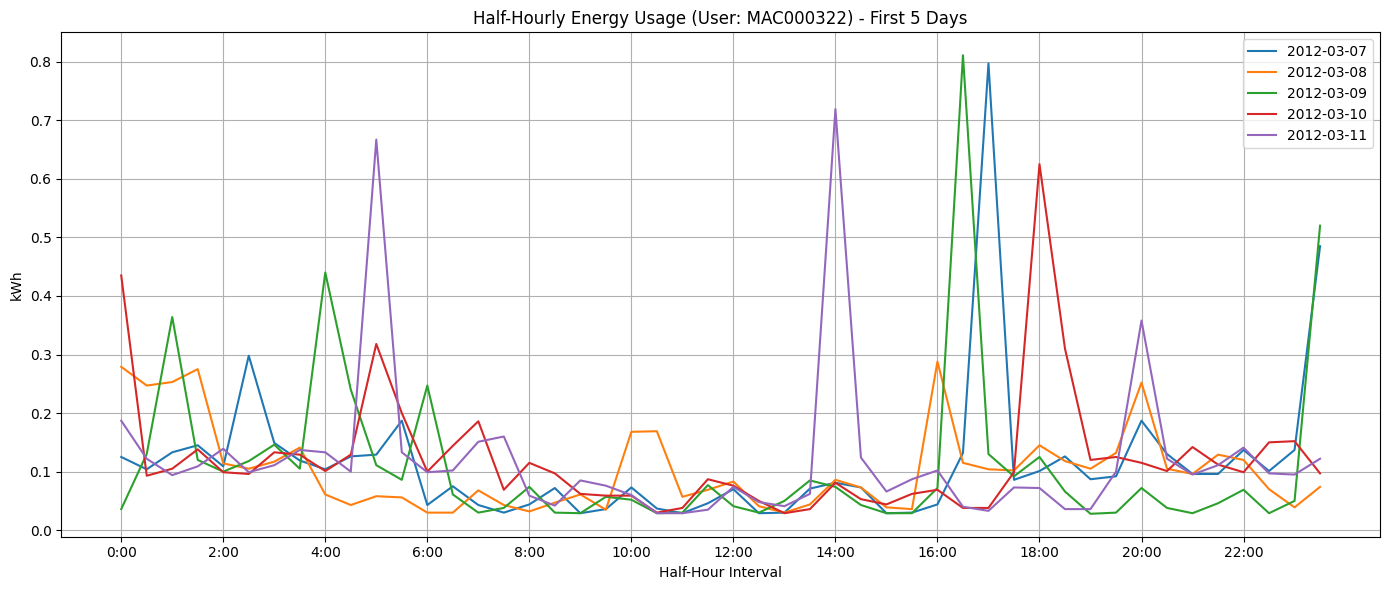

In [214]:
plt.figure(figsize=(14, 6))
for i in range(min(5, len(user_df))):
    day = user_df.iloc[i]['day']
    values = user_df.iloc[i, 2:]
    plt.plot(range(48), values, label=day.strftime("%Y-%m-%d"))

plt.title(f"Half-Hourly Energy Usage (User: {user}) - First 5 Days")
plt.xlabel("Half-Hour Interval")
plt.ylabel("kWh")
plt.xticks(range(0, 48, 4), [f"{h//2}:00" for h in range(0, 48, 4)])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

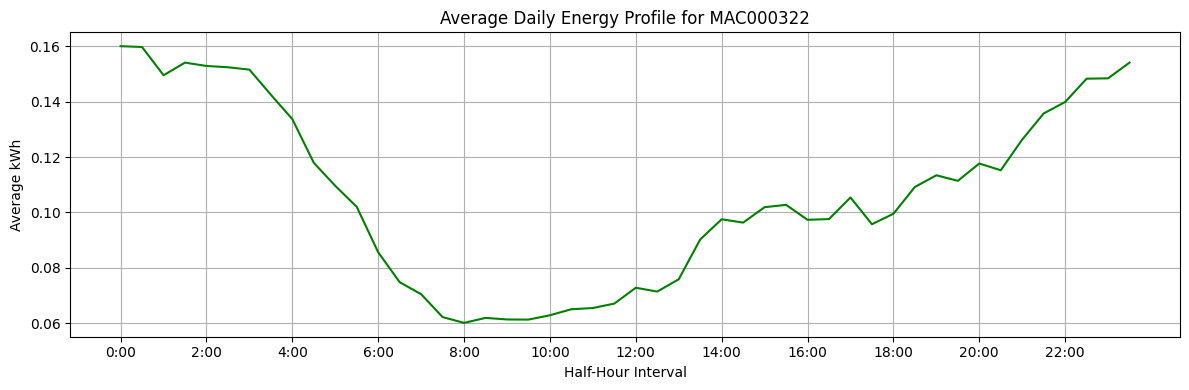

In [215]:
avg_profile = user_df.iloc[:, 2:].mean()

plt.figure(figsize=(12, 4))
plt.plot(range(48), avg_profile, color='green')
plt.title(f"Average Daily Energy Profile for {user}")
plt.xlabel("Half-Hour Interval")
plt.ylabel("Average kWh")
plt.xticks(range(0, 48, 4), [f"{h//2}:00" for h in range(0, 48, 4)])
plt.grid(True)
plt.tight_layout()
plt.show()

In [216]:
melted = user_df.melt(id_vars=['LCLid', 'day'], value_vars=[f"hh_{i}" for i in range(48)],
                      var_name='half_hour', value_name='energy_consumption')

melted['half_hour'] = melted['half_hour'].str.extract('(\d+)').astype(int)
melted['timestamp'] = melted['day'] + pd.to_timedelta(melted['half_hour'] * 30, unit='m')
ts_df = melted.set_index('timestamp').sort_index()

In [217]:
ts_df.head()

,LCLid,day,half_hour,energy_consumption
timestamp,,,,
2012-03-07 00:00:00,MAC000322,2012-03-07,0,0.125
2012-03-07 00:30:00,MAC000322,2012-03-07,1,0.104
2012-03-07 01:00:00,MAC000322,2012-03-07,2,0.133
2012-03-07 01:30:00,MAC000322,2012-03-07,3,0.145
2012-03-07 02:00:00,MAC000322,2012-03-07,4,0.109


##Average Hourly Energy Consumption Heatmap

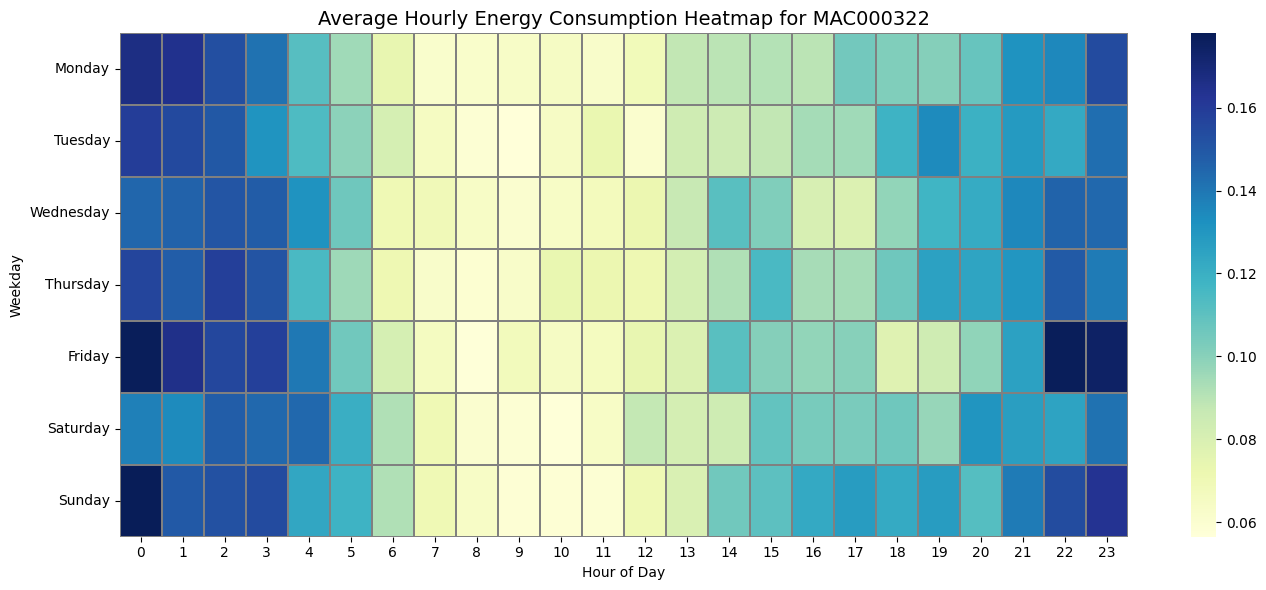

In [218]:
ts_df['hour'] = ts_df.index.hour
ts_df['weekday'] = ts_df.index.day_name()

energy_heatmap_data = ts_df.pivot_table(
    index='weekday',
    columns='hour',
    values='energy_consumption',
    aggfunc='mean'
)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=weekday_order, ordered=True)
energy_heatmap_data.index = energy_heatmap_data.index.astype(cat_type)
energy_heatmap_data = energy_heatmap_data.sort_index()

plt.figure(figsize=(14, 6))
sns.heatmap(energy_heatmap_data, cmap='YlGnBu', linewidths=0.3, linecolor='gray')

plt.title(f'Average Hourly Energy Consumption Heatmap for {user}', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()

 ## Energy Consumption Heatmap (Weekday vs Hour)

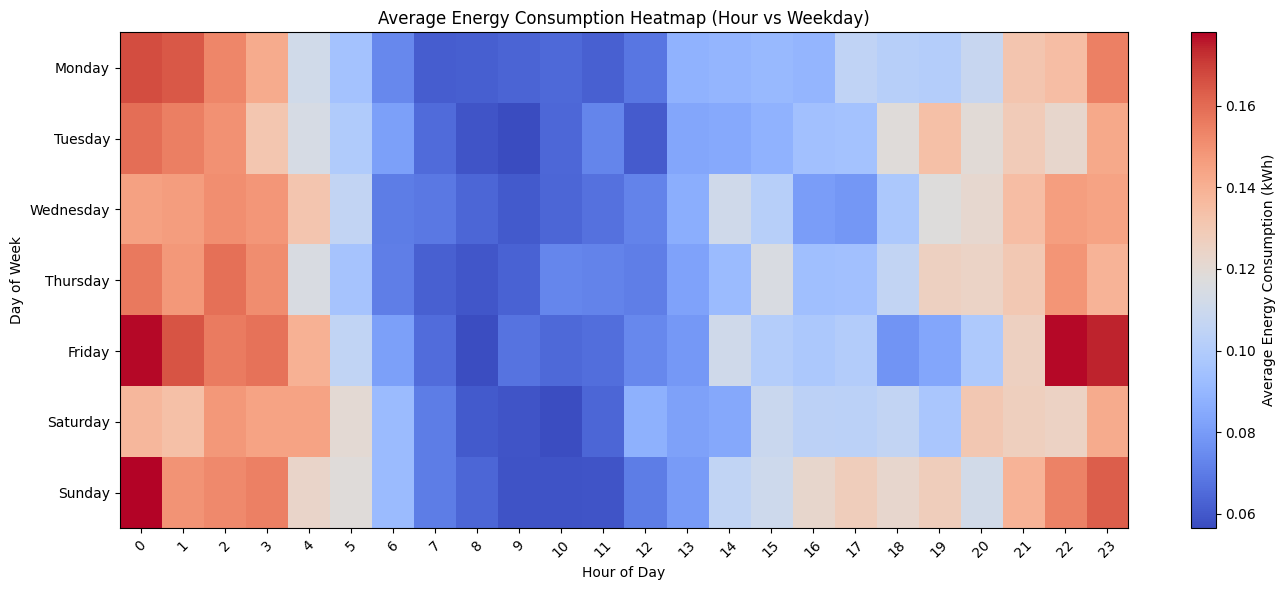

In [227]:
ts_df['hour'] = ts_df.index.hour
ts_df['weekday_name'] = ts_df.index.day_name()

energy_plot_df = ts_df.pivot_table(index='weekday_name', columns='hour', values='energy_consumption', aggfunc='mean')


weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
energy_plot_df = energy_plot_df.reindex(weekday_order)

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
img = axs.imshow(energy_plot_df, cmap='coolwarm', interpolation='nearest', aspect='auto')

fig.colorbar(img, ax=axs, label='Average Energy Consumption (kWh)')

axs.set_xticks(range(len(energy_plot_df.columns)))
axs.set_xticklabels(energy_plot_df.columns, rotation=45)
axs.set_yticks(range(len(energy_plot_df.index)))
axs.set_yticklabels(energy_plot_df.index)

axs.set_xlabel("Hour of Day")
axs.set_ylabel("Day of Week")
axs.set_title("Average Energy Consumption Heatmap (Hour vs Weekday)")

plt.tight_layout()
plt.show()

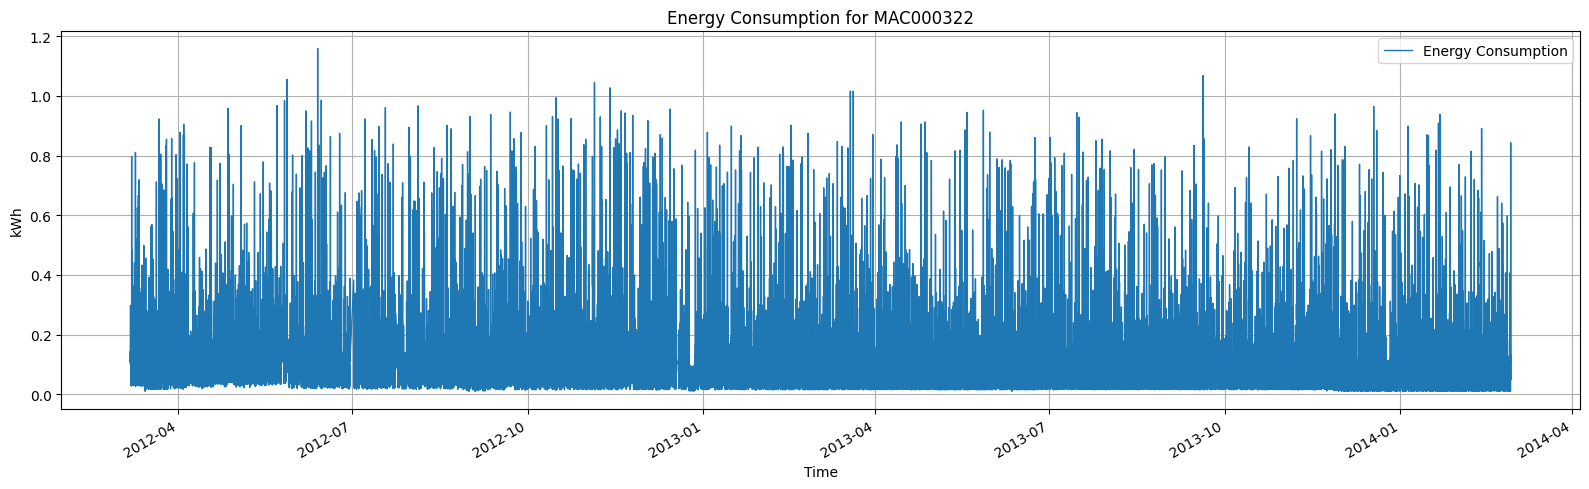

In [219]:
plt.figure(figsize=(16, 5))
ts_df['energy_consumption'].plot(label='Energy Consumption', linewidth=1)
plt.title(f'Energy Consumption for {user}')
plt.xlabel('Time')
plt.ylabel('kWh')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Boxplots of Energy Consumption by Hour of Day for Each Weekday

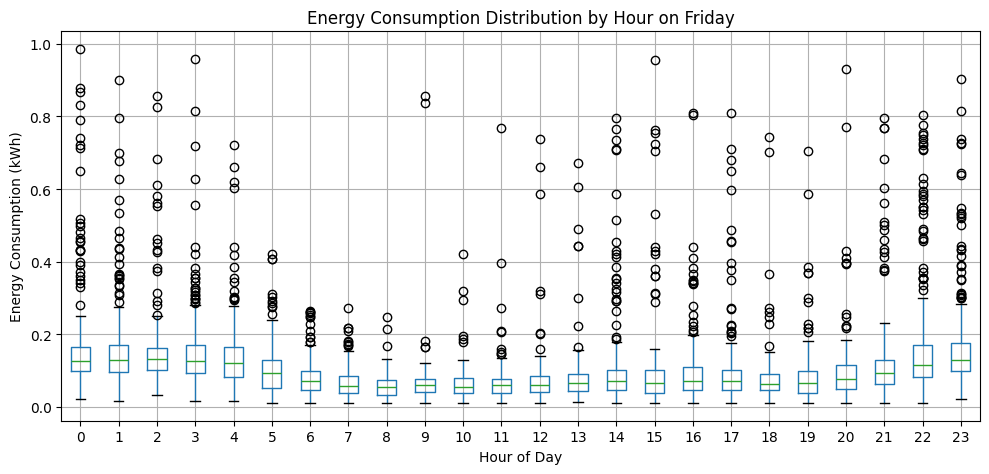

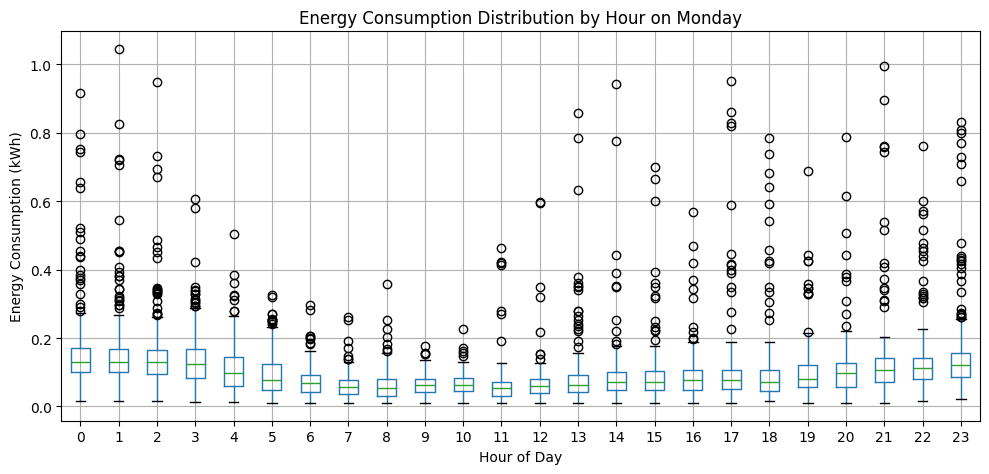

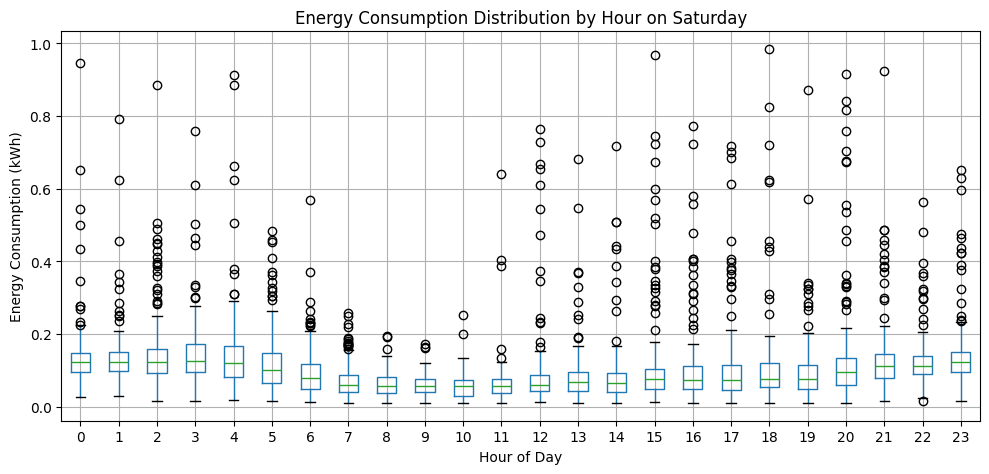

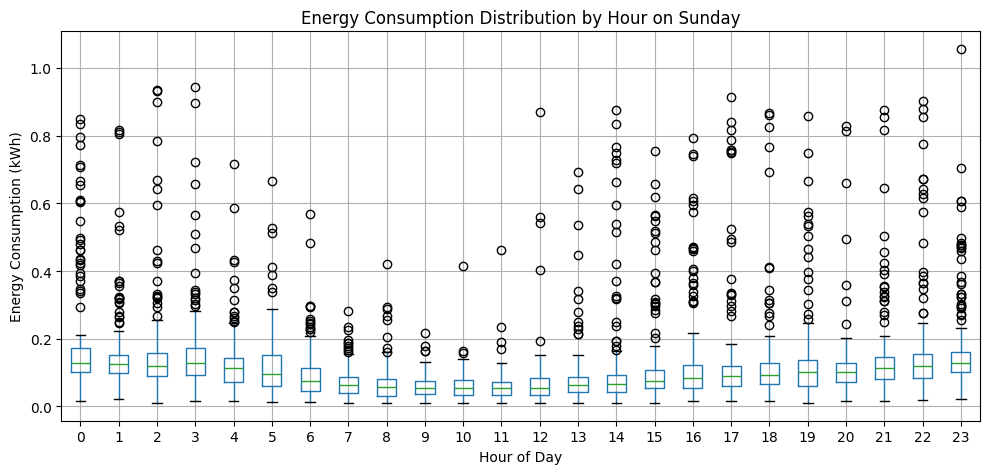

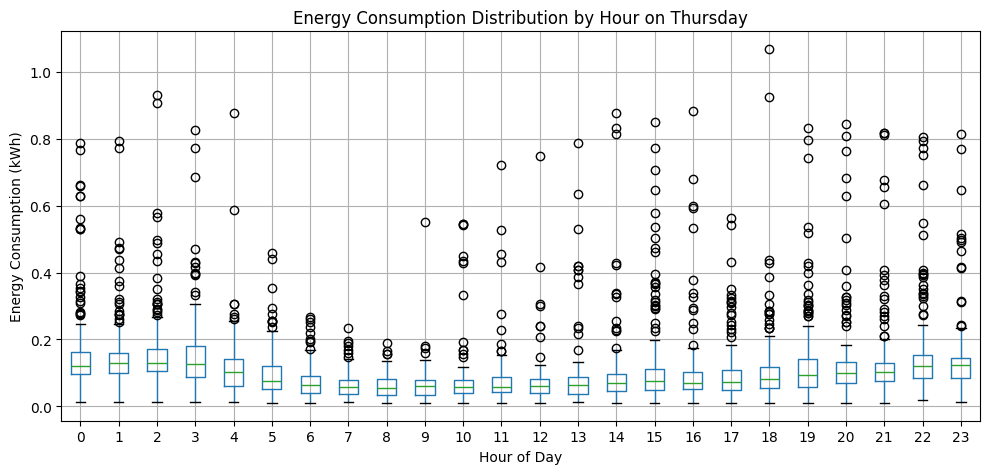

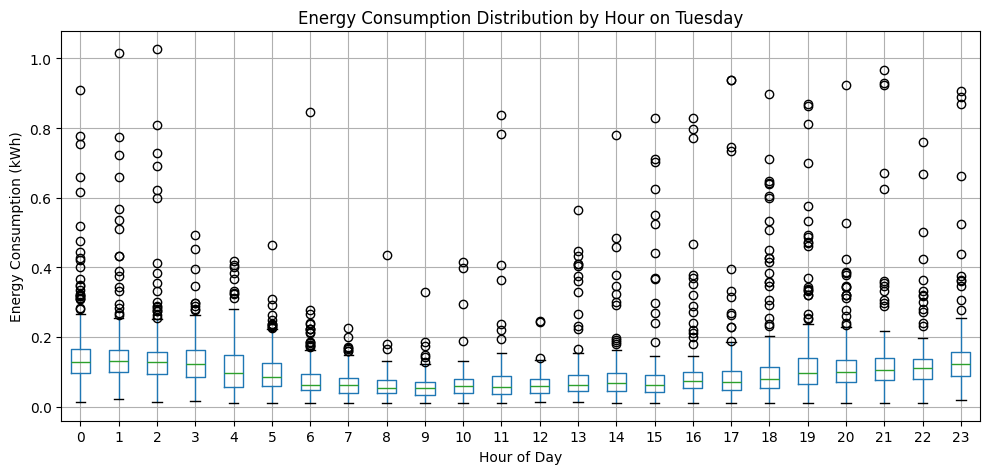

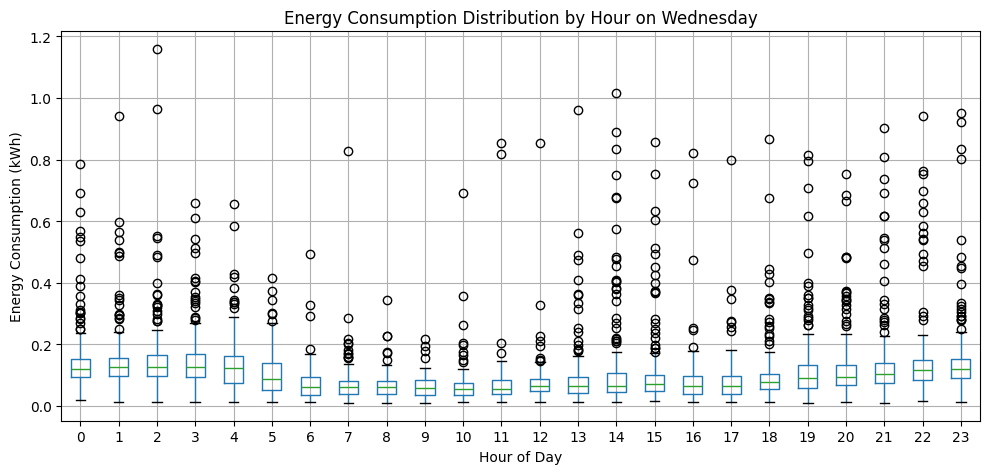

In [225]:
ts_df['hour'] = ts_df.index.hour
ts_df['weekday_name'] = ts_df.index.day_name()


for weekday, group in ts_df.groupby('weekday_name'):
    fig, ax = plt.subplots(figsize=(10, 5))

    group.boxplot(column='energy_consumption', by='hour', ax=ax)

    ax.set_title(f"Energy Consumption Distribution by Hour on {weekday}")
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Energy Consumption (kWh)')
    ax.grid(True)
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# Decomposition

## Daily Energy Consumption with Moving Average

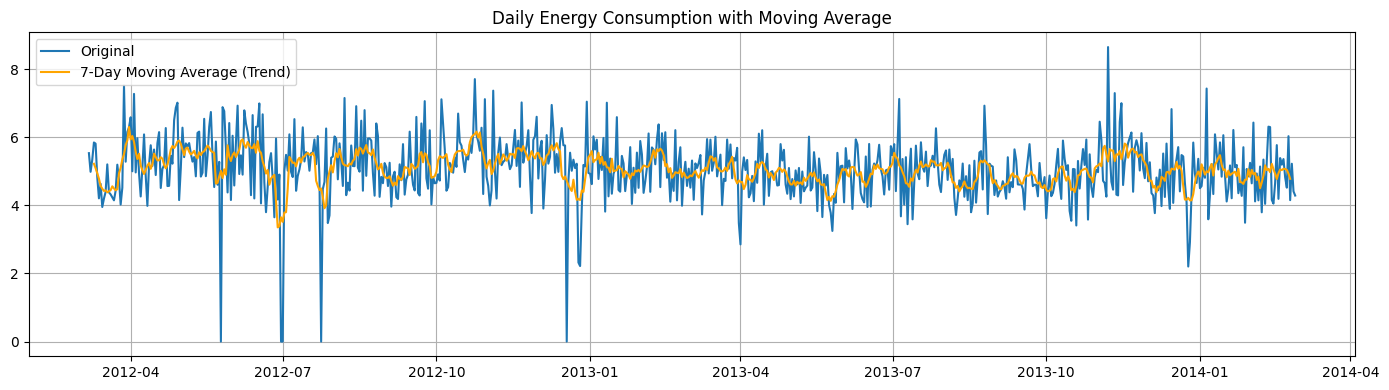

In [221]:

daily_ts = ts_df['energy_consumption'].resample('D').sum()

rolling_window = 7
trend_ma = daily_ts.rolling(window=rolling_window, center=True).mean()

plt.figure(figsize=(14, 4))
plt.plot(daily_ts, label='Original')
plt.plot(trend_ma, label='7-Day Moving Average (Trend)', color='orange')
plt.title('Daily Energy Consumption with Moving Average')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Basic Seasonal Decomposition

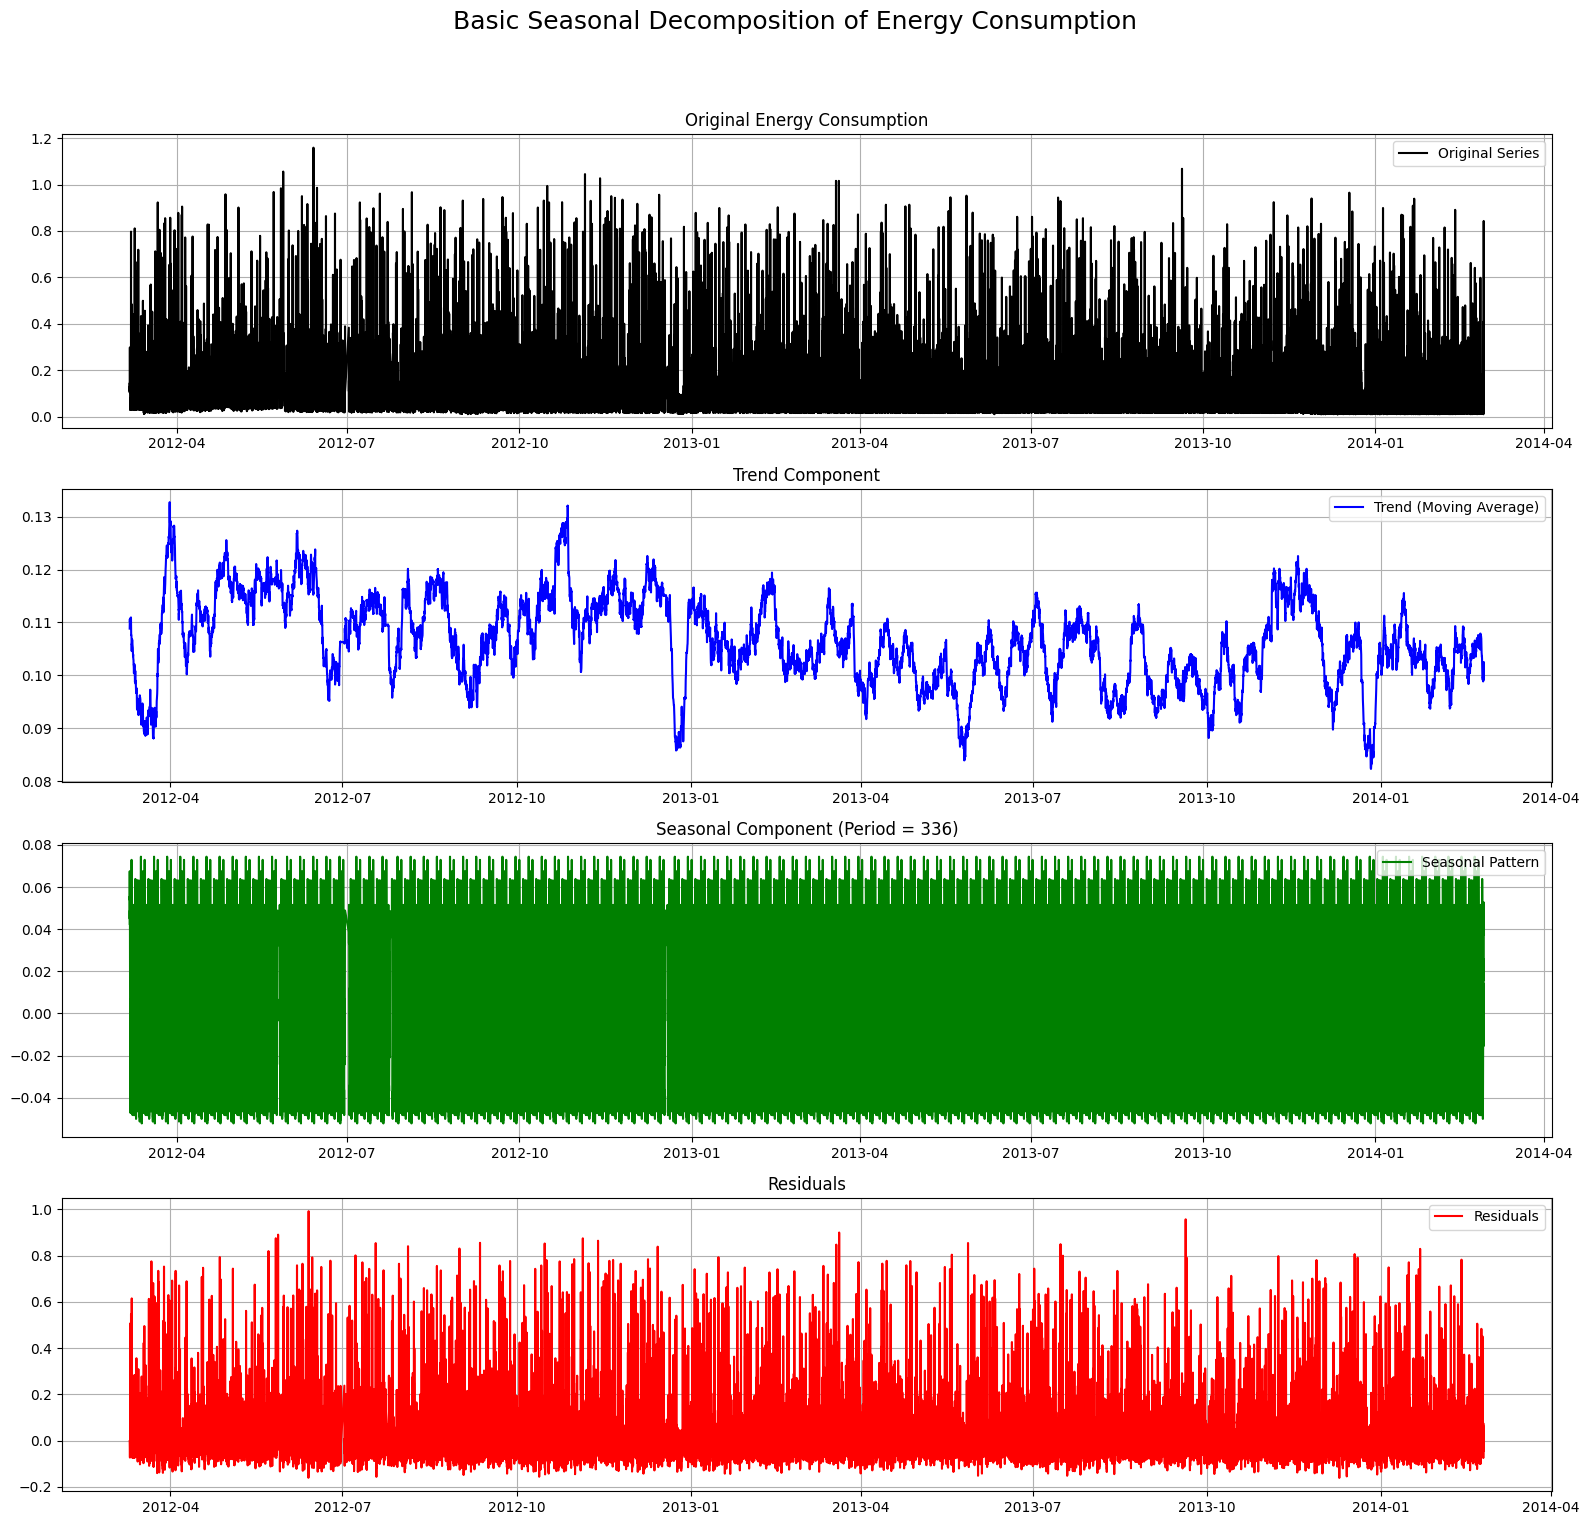

In [231]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def plot_normal_seasonal_decomposition(ts_df, column, seasonal_period):

    decomposition = seasonal_decompose(ts_df[column], model='additive', period=seasonal_period)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    fig, axs = plt.subplots(4, 1, figsize=(16, 16))

    axs[0].plot(ts_df[column], label='Original Series', color='black')
    axs[0].set_title('Original Energy Consumption')

    axs[1].plot(trend, label='Trend (Moving Average)', color='blue')
    axs[1].set_title('Trend Component')

    axs[2].plot(seasonal, label='Seasonal Pattern', color='green')
    axs[2].set_title(f'Seasonal Component (Period = {seasonal_period})')

    axs[3].plot(residual, label='Residuals', color='red')
    axs[3].set_title('Residuals')

    for ax in axs:
        ax.legend()
        ax.grid(True)

    fig.suptitle('Basic Seasonal Decomposition of Energy Consumption', fontsize=18)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_normal_seasonal_decomposition(ts_df, 'energy_consumption', seasonal_period=7 * 48)

## STL Decomposition (LOESS + Seasonal)

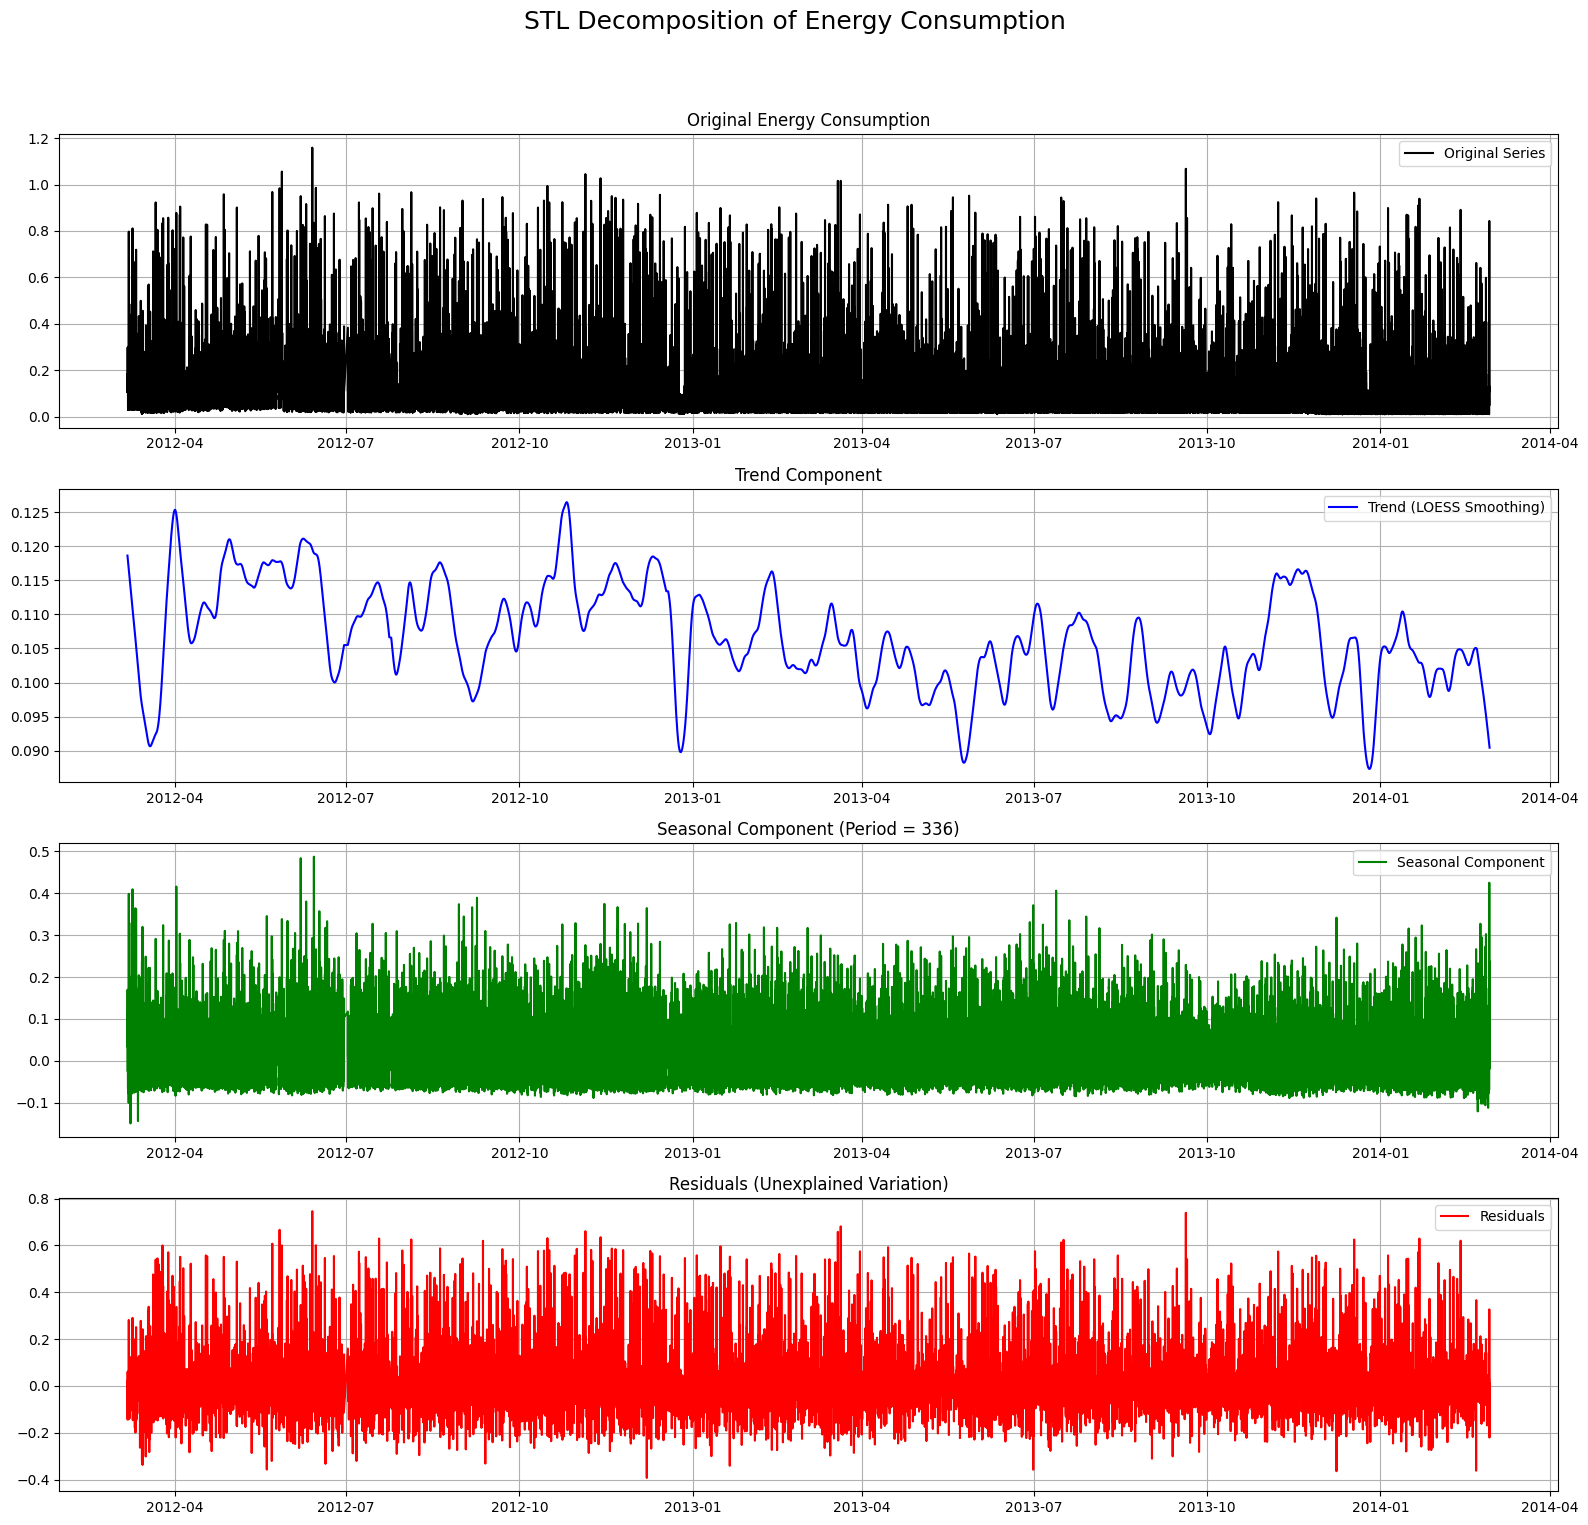

In [233]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

def plot_stl_decomposition(ts_df, column, period=7*48):
    stl = STL(ts_df[column], period=period)
    res = stl.fit()

    fig, axs = plt.subplots(4, 1, figsize=(16, 16))

    axs[0].plot(ts_df[column], label='Original Series', color='black')
    axs[0].set_title('Original Energy Consumption')

    axs[1].plot(res.trend, label='Trend (LOESS Smoothing)', color='blue')
    axs[1].set_title('Trend Component')

    axs[2].plot(res.seasonal, label='Seasonal Component', color='green')
    axs[2].set_title(f'Seasonal Component (Period = {period})')

    axs[3].plot(res.resid, label='Residuals', color='red')
    axs[3].set_title('Residuals (Unexplained Variation)')

    for ax in axs:
        ax.legend()
        ax.grid(True)

    fig.suptitle('STL Decomposition of Energy Consumption', fontsize=18)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_stl_decomposition(ts_df, 'energy_consumption')

## Fourier Series

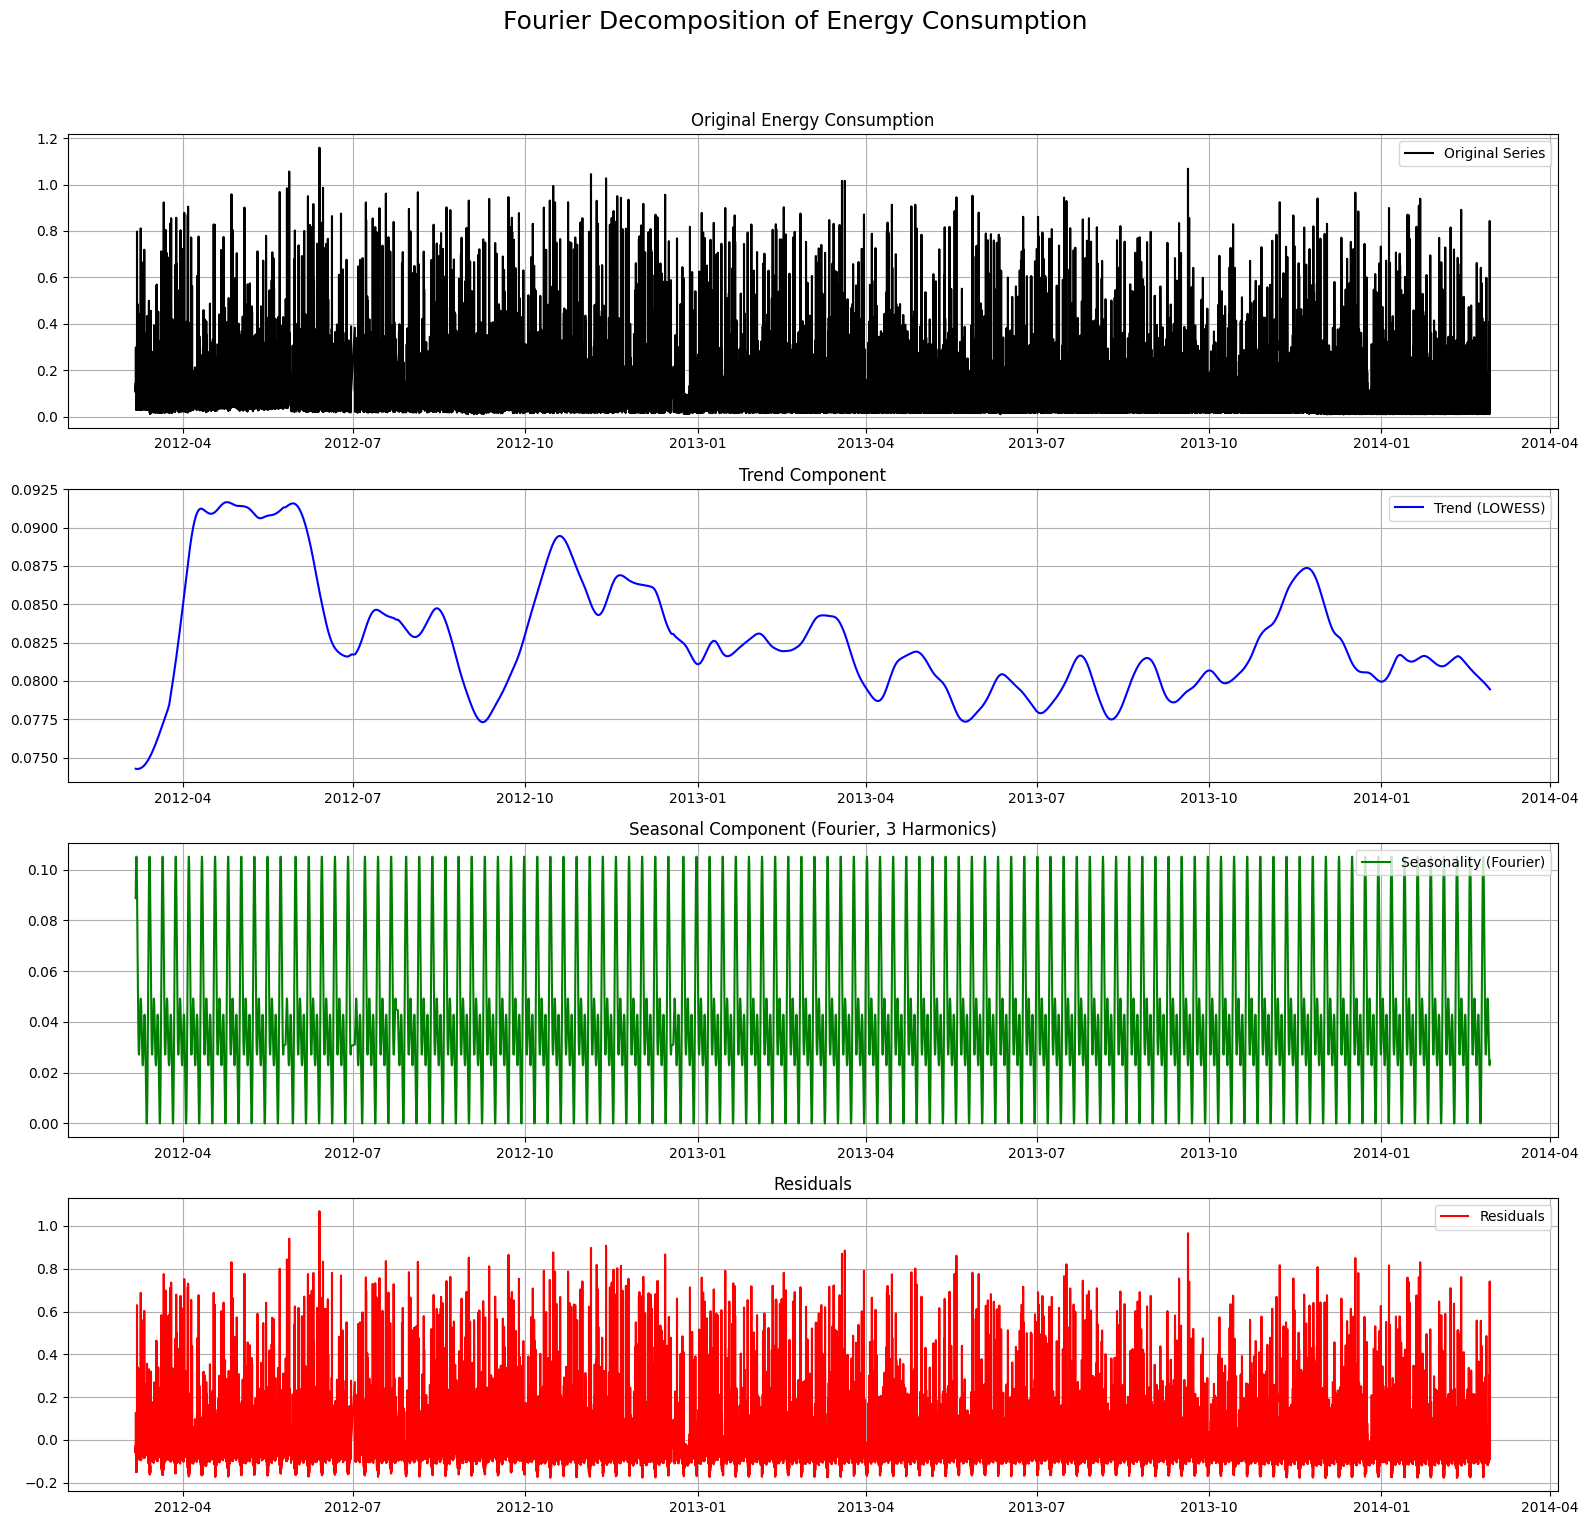

In [229]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_fourier_decomposition(ts_df, column, seasonal_period, num_harmonics):

    trend = lowess(ts_df[column], np.arange(len(ts_df)), frac=0.05)[:, 1]

    detrended_series = ts_df[column] - trend

    time = np.arange(len(ts_df[column]))
    seasonal = np.zeros_like(ts_df[column])
    for i in range(1, num_harmonics + 1):
        seasonal += (
            np.sin(2 * np.pi * i * time / seasonal_period) +
            np.cos(2 * np.pi * i * time / seasonal_period)
        )

    seasonal = (seasonal - seasonal.min()) / (seasonal.max() - seasonal.min())
    seasonal = seasonal * detrended_series.std()

    residual = detrended_series - seasonal

    trend_series = pd.Series(trend, index=ts_df.index)
    seasonal_series = pd.Series(seasonal, index=ts_df.index)
    residual_series = pd.Series(residual, index=ts_df.index)

    fig, axs = plt.subplots(4, 1, figsize=(16, 16))

    axs[0].plot(ts_df[column], label='Original Series', color='black')
    axs[0].set_title('Original Energy Consumption')

    axs[1].plot(trend_series, label='Trend (LOWESS)', color='blue')
    axs[1].set_title('Trend Component')

    axs[2].plot(seasonal_series, label='Seasonality (Fourier)', color='green')
    axs[2].set_title(f'Seasonal Component (Fourier, {num_harmonics} Harmonics)')

    axs[3].plot(residual_series, label='Residuals', color='red')
    axs[3].set_title('Residuals')

    for ax in axs:
        ax.legend()
        ax.grid(True)

    fig.suptitle('Fourier Decomposition of Energy Consumption', fontsize=18)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_fourier_decomposition(ts_df, 'energy_consumption', seasonal_period=7 * 48, num_harmonics=3)

## MSTL Decomposition: Energy Consumption


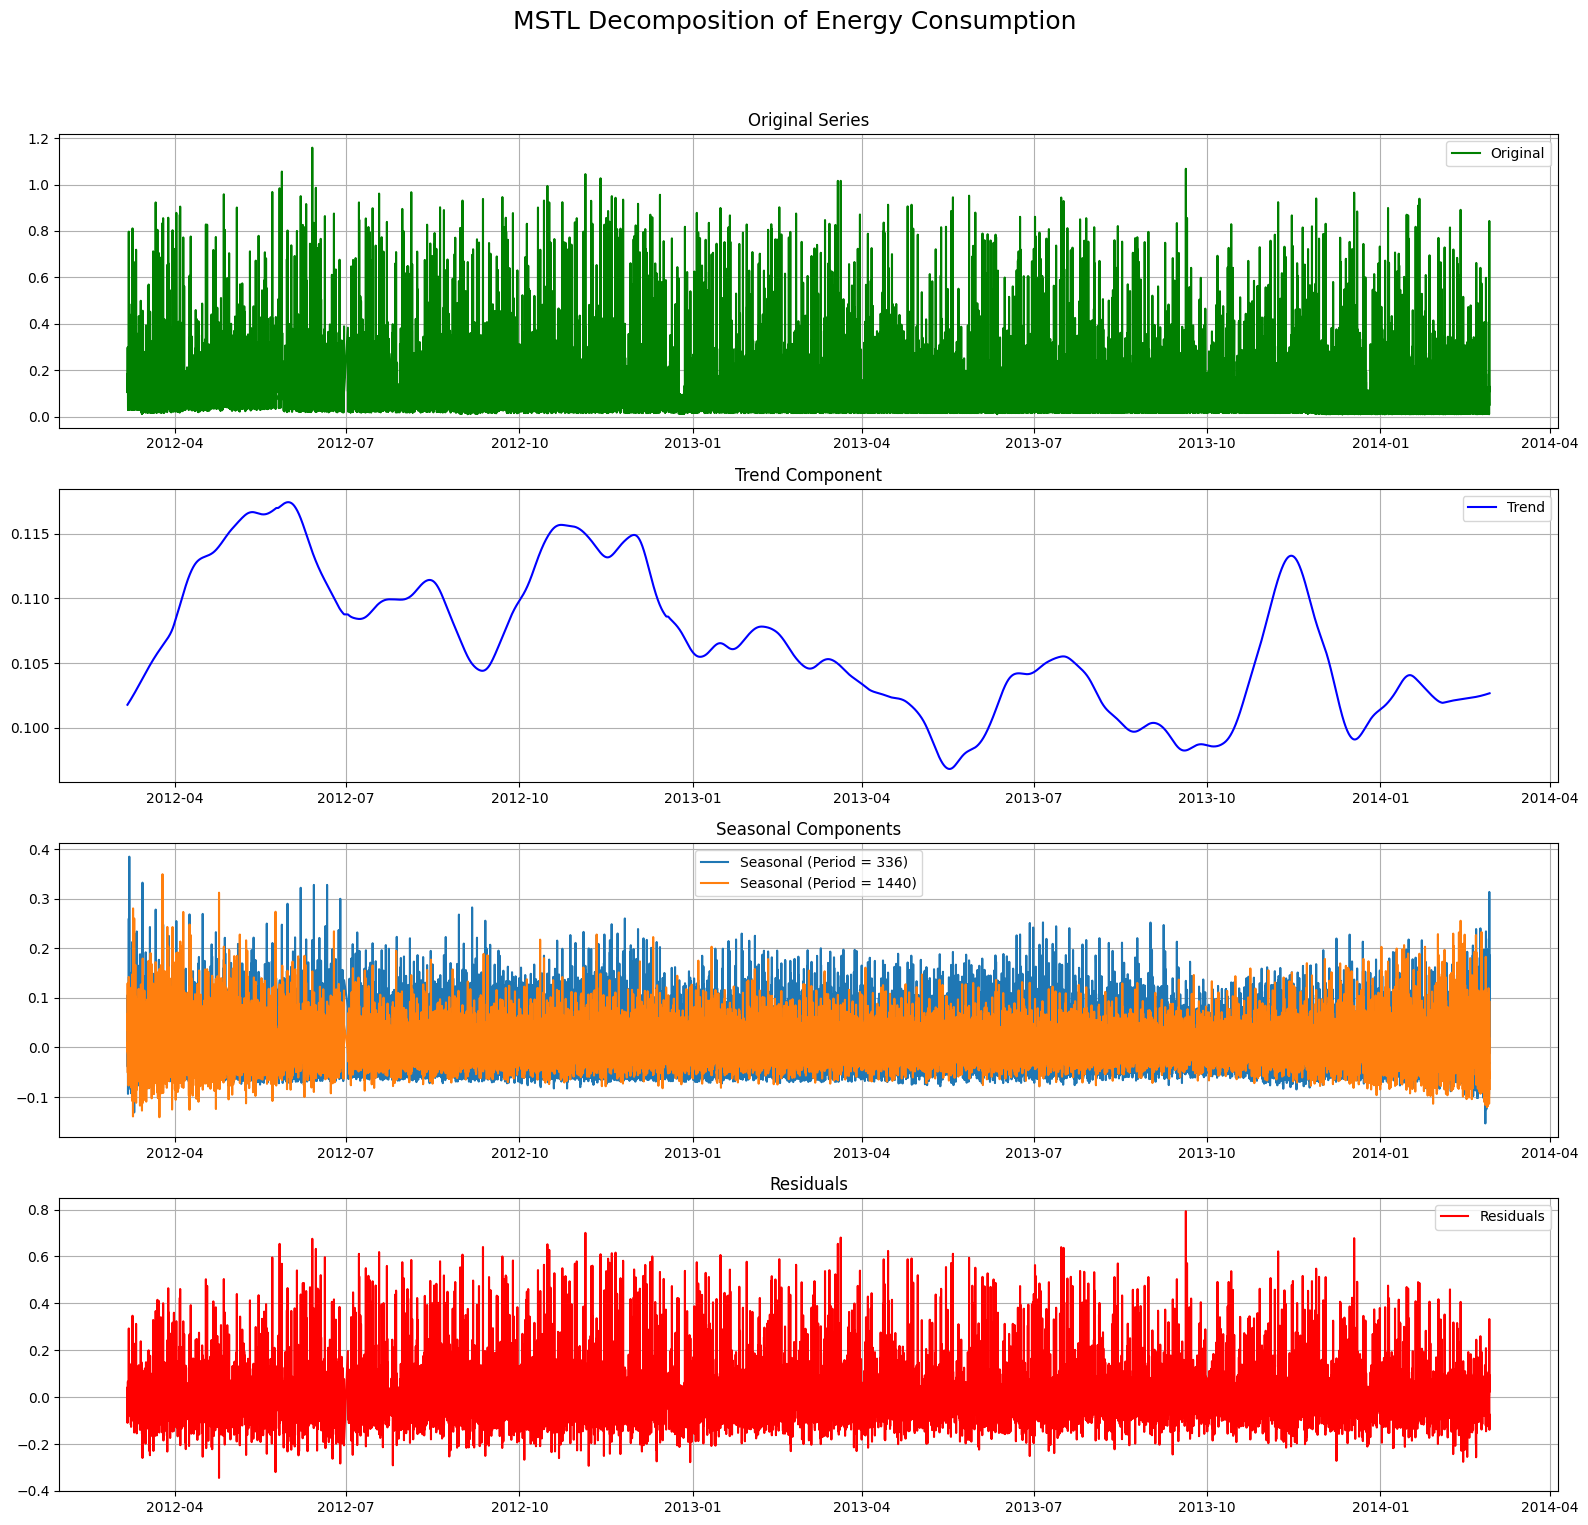

In [232]:
from statsmodels.tsa.seasonal import MSTL
import matplotlib.pyplot as plt

def plot_mstl_decomposition(ts_df, column, periods=[]):

    mstl = MSTL(ts_df[column], periods=periods)
    res = mstl.fit()

    fig, axs = plt.subplots(4, 1, figsize=(16, 16))

    axs[0].plot(ts_df[column], label='Original', color='green')
    axs[0].set_title('Original Series')

    axs[1].plot(res.trend, label='Trend', color='blue')
    axs[1].set_title('Trend Component')

    for i, period in enumerate(periods):
        axs[2].plot(res.seasonal.iloc[:, i], label=f'Seasonal (Period = {period})')
    axs[2].set_title('Seasonal Components')
    axs[2].legend()

    axs[3].plot(res.resid, label='Residuals', color='red')
    axs[3].set_title('Residuals')

    for ax in axs:
        ax.legend()
        ax.grid(True)

    fig.suptitle('MSTL Decomposition of Energy Consumption', fontsize=18)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_mstl_decomposition(ts_df, 'energy_consumption', periods=[7 * 48, 30 * 48])